In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load pre-trained BERTu model and tokenizer

model_name = 'MLRS/BERTu'

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
model.eval()  # Set the model to evaluation mode

# Words to analyze
words = [
    "hi", "hu", "aggressiv", "assistent", "ġellied", "ambizzjuż", "terrorist", "suldat",
    "serġent", "emozzjonali", "grazzjuż", "parrukkier", "pulizija", "għira",
    "gangster", "infermier", "ġentili", "passiv", "roża", "romantiku", "segretarju",
    "selfie", "submissiv", "ħelu", "ħelwa", "rqiqa", "dgħajjef", "dgħajfa", "isteriku", "make-up"
]


# Tokenize and obtain embeddings
def get_word_embeddings(words, tokenizer, model):
    embeddings = []
    with torch.no_grad():
        for word in words:
            # Tokenize the word
            inputs = tokenizer(word, return_tensors='pt')
            outputs = model(**inputs)
            # Use the last hidden state for embeddings
            last_hidden_states = outputs.last_hidden_state
            # Mean pooling to get a single vector for the word
            word_embedding = last_hidden_states.mean(dim=1).squeeze().numpy()
            embeddings.append(word_embedding)
    return np.array(embeddings)

# Get embeddings
embeddings = get_word_embeddings(words, tokenizer, model)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color='blue')

# Highlight 'she' and 'he'
plt.scatter(reduced_embeddings[-2, 0], reduced_embeddings[-2, 1], color='red', label='hi')
plt.scatter(reduced_embeddings[-1, 0], reduced_embeddings[-1, 1], color='green', label='hu')

# Annotate points
for i, word in enumerate(words[:-2]):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.legend()
plt.title("2D Plot of Words in Relation to 'She' and 'He'")
plt.show()


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/401k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/807k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at MLRS/BERTu and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: perplexity must be less than n_samples

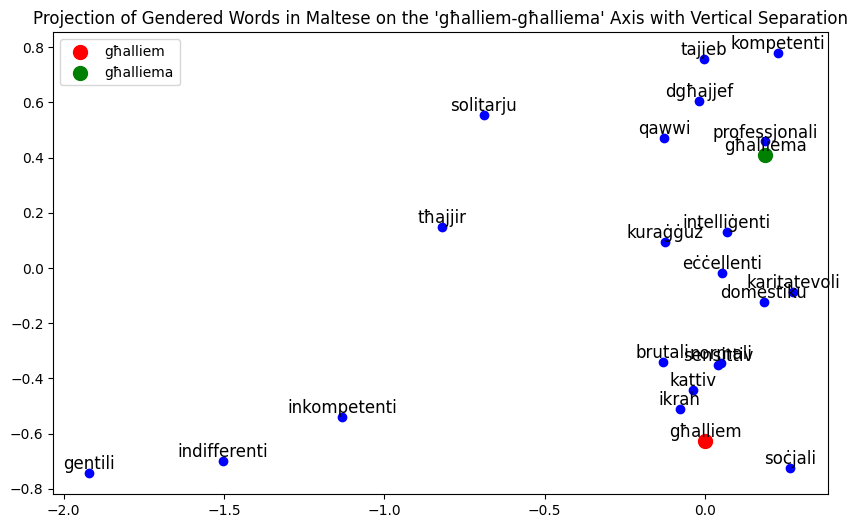

In [ ]:
# Install necessary packages
# !pip install transformers
# !pip install torch
# !pip install sklearn
# !pip install matplotlib

from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Maltese BERT model and tokenizer from Hugging Face (BERTu)
# Using the base 'bert-base-multilingual-cased' model as a proxy for BERTu
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("MLRS/BERTu")
model = AutoModelForMaskedLM.from_pretrained("MLRS/BERTu",output_hidden_states=True)

# Step 2: Define gender-specific words (Maltese translations)
# gendered_words_mt = [
#     "hu", "hi", "raġel", "mara", "re", "reġina", "lilu", "lilha", "maskili", "femminili",
#     "missier", "omm", "ħu", "oħt", "iben", "bint", "raġel", "mara", "infermier", "tabib",
#     "qawwi", "kuraġġuż", "mexxej", "għalliem", "pilota", "segretarju"
# ]
gendered_words_mt = [ "għalliem", "għalliema",
    "qawwi",         # strong
    "dgħajjef",       # weak
    "kuraġġuż",      # courageous
    "tħajjir",        # inspiring
    "gentili",        # kind
    "brutali",        # brutal
    "intelliġenti",   # intelligent
    "ikrah",          # hateful
    "sensittiv",      # sensitive
    "tajjeb",         # good
    "kattiv",         # bad
    "kompetenti",     # competent
    "inkompetenti",   # incompetent
    "eċċellenti",     # excellent
    "normali",        # normal
    "professjonali",  # professional
    "domestiku",      # domestic
    "karitatevoli",   # charitable
    "indifferenti",   # indifferent
    "solitarju",      # solitary
    "soċjali"         # social
]


# Step 3: Function to get word embeddings from BERT
def get_word_embedding(word):
    inputs = tokenizer(word, return_tensors='pt', add_special_tokens=False)
    with torch.no_grad():
        outputs = model(**inputs)
        # Check if the model output has hidden states
        if hasattr(outputs, 'hidden_states'):
            # Extract the last hidden state
            return outputs.hidden_states[-1].mean(dim=1).squeeze(0).numpy()
        else:
            # If the model doesn't return hidden states, check for 'logits'
            return outputs.logits.mean(dim=1).squeeze(0).numpy()


# Get embeddings for "hu" (he) and "hi" (she)
hu_embedding = get_word_embedding("għalliem")
hi_embedding = get_word_embedding("għalliema")

# Create a direction vector from 'hu' to 'hi'
direction_vector = hi_embedding - hu_embedding

# Normalize the direction vector
direction_vector = direction_vector / np.linalg.norm(direction_vector)

# Step 4: Project other gendered word embeddings onto the 'hu-hi' axis
def project_onto_direction(word_embedding, direction_vector):
    # Calculate the dot product to get the scalar projection onto the direction vector
    return np.dot(word_embedding - hu_embedding, direction_vector)

# Step 5: Project onto an arbitrary vertical axis for separation (optional, here I use random for vertical separation)
def random_vertical_projection():
    return np.random.uniform(-1, 1)  # Random vertical position for better visualization

# Get the projections for all gendered words (Maltese)
horizontal_projections = []
vertical_projections = []
for word in gendered_words_mt:
    word_embedding = get_word_embedding(word)
    # Projection along the 'hu-hi' axis (horizontal)
    horizontal_projection = project_onto_direction(word_embedding, direction_vector)
    horizontal_projections.append(horizontal_projection)
    # Random vertical projection (you can modify this to use another dimension of the embedding)
    vertical_projection = random_vertical_projection()
    vertical_projections.append(vertical_projection)

# Convert projections to NumPy arrays
horizontal_projections = np.array(horizontal_projections)
vertical_projections = np.array(vertical_projections)

# Step 6: Plot the words along the 'hu-hi' axis with vertical separation
plt.figure(figsize=(10, 6))

# Plot all words except 'hu' and 'hi'
plt.scatter(horizontal_projections[2:], vertical_projections[2:], color='blue')

# Highlight 'hu' and 'hi' with different colors and larger marker sizes
hu_index = gendered_words_mt.index("għalliem")
hi_index = gendered_words_mt.index("għalliema")

plt.scatter(horizontal_projections[hu_index], vertical_projections[hu_index], color='red', s=100, label='għalliem')   # Red for 'hu'
plt.scatter(horizontal_projections[hi_index], vertical_projections[hi_index], color='green', s=100, label='għalliema')  # Green for 'hi'

# Annotate each point with the corresponding word
for i, word in enumerate(gendered_words_mt):
    plt.annotate(word, (horizontal_projections[i], vertical_projections[i]), fontsize=12, ha='center', va='bottom')

# Remove the vertical dotted line (axvline)
# plt.axvline(0, color='black', linestyle='--')  # Commented out to remove the line

# Plot title and show the plot
plt.title("Projection of Gendered Words in Maltese on the 'għalliem-għalliema' Axis with Vertical Separation")
plt.legend()
plt.show()

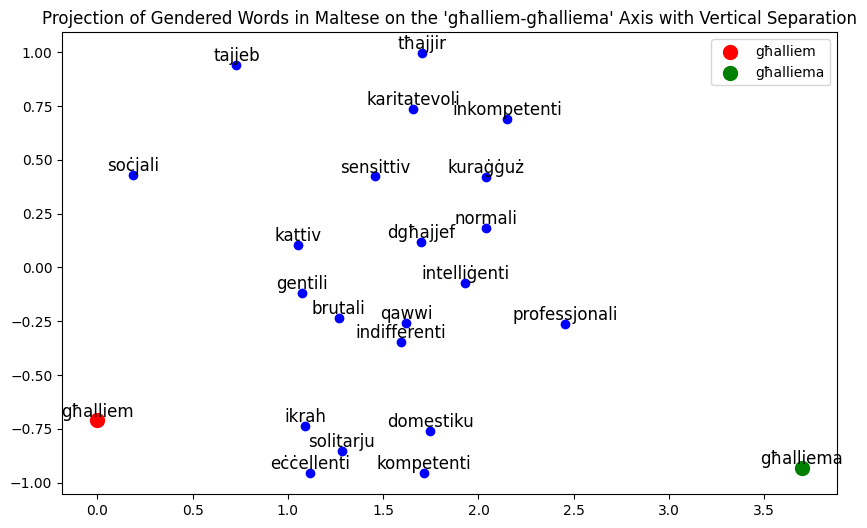

In [ ]:
# Install necessary packages
# !pip install transformers
# !pip install torch
# !pip install sklearn
# !pip install matplotlib

from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Maltese BERT model and tokenizer from Hugging Face (BERTu)
# Using the base 'bert-base-multilingual-cased' model as a proxy for BERTu
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("MLRS/mBERTu")
model = AutoModelForMaskedLM.from_pretrained("MLRS/mBERTu",output_hidden_states=True)

# Step 2: Define gender-specific words (Maltese translations)
# gendered_words_mt = [
#     "hu", "hi", "raġel", "mara", "re", "reġina", "lilu", "lilha", "maskili", "femminili",
#     "missier", "omm", "ħu", "oħt", "iben", "bint", "raġel", "mara", "infermier", "tabib",
#     "qawwi", "kuraġġuż", "mexxej", "għalliem", "pilota", "segretarju"
# ]
gendered_words_mt = [ "għalliem", "għalliema",
    "qawwi",         # strong
    "dgħajjef",       # weak
    "kuraġġuż",      # courageous
    "tħajjir",        # inspiring
    "gentili",        # kind
    "brutali",        # brutal
    "intelliġenti",   # intelligent
    "ikrah",          # hateful
    "sensittiv",      # sensitive
    "tajjeb",         # good
    "kattiv",         # bad
    "kompetenti",     # competent
    "inkompetenti",   # incompetent
    "eċċellenti",     # excellent
    "normali",        # normal
    "professjonali",  # professional
    "domestiku",      # domestic
    "karitatevoli",   # charitable
    "indifferenti",   # indifferent
    "solitarju",      # solitary
    "soċjali"         # social
]


# Step 3: Function to get word embeddings from BERT
def get_word_embedding(word):
    inputs = tokenizer(word, return_tensors='pt', add_special_tokens=False)
    with torch.no_grad():
        outputs = model(**inputs)
        # Check if the model output has hidden states
        if hasattr(outputs, 'hidden_states'):
            # Extract the last hidden state
            return outputs.hidden_states[-1].mean(dim=1).squeeze(0).numpy()
        else:
            # If the model doesn't return hidden states, check for 'logits'
            return outputs.logits.mean(dim=1).squeeze(0).numpy()


# Get embeddings for "hu" (he) and "hi" (she)
hu_embedding = get_word_embedding("għalliem")
hi_embedding = get_word_embedding("għalliema")

# Create a direction vector from 'hu' to 'hi'
direction_vector = hi_embedding - hu_embedding

# Normalize the direction vector
direction_vector = direction_vector / np.linalg.norm(direction_vector)

# Step 4: Project other gendered word embeddings onto the 'hu-hi' axis
def project_onto_direction(word_embedding, direction_vector):
    # Calculate the dot product to get the scalar projection onto the direction vector
    return np.dot(word_embedding - hu_embedding, direction_vector)

# Step 5: Project onto an arbitrary vertical axis for separation (optional, here I use random for vertical separation)
def random_vertical_projection():
    return np.random.uniform(-1, 1)  # Random vertical position for better visualization

# Get the projections for all gendered words (Maltese)
horizontal_projections = []
vertical_projections = []
for word in gendered_words_mt:
    word_embedding = get_word_embedding(word)
    # Projection along the 'hu-hi' axis (horizontal)
    horizontal_projection = project_onto_direction(word_embedding, direction_vector)
    horizontal_projections.append(horizontal_projection)
    # Random vertical projection (you can modify this to use another dimension of the embedding)
    vertical_projection = random_vertical_projection()
    vertical_projections.append(vertical_projection)

# Convert projections to NumPy arrays
horizontal_projections = np.array(horizontal_projections)
vertical_projections = np.array(vertical_projections)

# Step 6: Plot the words along the 'hu-hi' axis with vertical separation
plt.figure(figsize=(10, 6))

# Plot all words except 'hu' and 'hi'
plt.scatter(horizontal_projections[2:], vertical_projections[2:], color='blue')

# Highlight 'hu' and 'hi' with different colors and larger marker sizes
hu_index = gendered_words_mt.index("għalliem")
hi_index = gendered_words_mt.index("għalliema")

plt.scatter(horizontal_projections[hu_index], vertical_projections[hu_index], color='red', s=100, label='għalliem')   # Red for 'hu'
plt.scatter(horizontal_projections[hi_index], vertical_projections[hi_index], color='green', s=100, label='għalliema')  # Green for 'hi'

# Annotate each point with the corresponding word
for i, word in enumerate(gendered_words_mt):
    plt.annotate(word, (horizontal_projections[i], vertical_projections[i]), fontsize=12, ha='center', va='bottom')

# Remove the vertical dotted line (axvline)
# plt.axvline(0, color='black', linestyle='--')  # Commented out to remove the line

# Plot title and show the plot
plt.title("Projection of Gendered Words in Maltese on the 'għalliem-għalliema' Axis with Vertical Separation")
plt.legend()
plt.show()
